# Example: Data Fitting
In this example, we will generate data, plot this data, and then use the scipy optimize functions to fit an equation to the data. 

In [11]:
import matplotlib.pyplot as plt
import numpy as np

First, let us generate some data points that will be used as input for data fitting. Here, we will simply generate a set of points that follow the Lennard-Jones equation.  

In [12]:
#define target sigma and epsilon values for the Lennard-Jones equation
sigma_data = 1.392
epsilon_data = 2.239

#define the range for which we will generate data
r_init = 0.9
r_final = 3.0
r_step = 30
dr = (r_final-r_init)/r_step

#create two list
r_data = []
U_data = []

#populate the arrays with values from the Lennard-Jones equation
for i in range(0, r_step):
    r = r_init + i*dr
    r_data.append(r)
    U_temp = 4.0*epsilon_data*( (sigma_data/r)**12.0 - (sigma_data/r)**6.0)
    U_data.append(U_temp)

Let us now use matplotlib to plot the data we just generated.

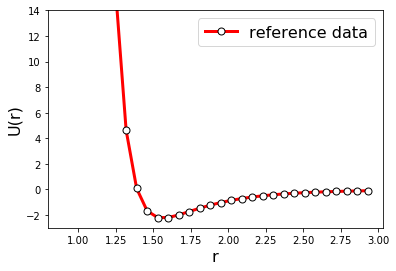

In [24]:
plt.figure()
plt.plot(r_data, U_data, label = "reference data", markeredgecolor= 'black', 
         markersize= 7, markerfacecolor='white', marker='o', ls='-', lw=3, color='Red')

plt.xlabel('r', fontsize= 16)
plt.ylabel('U(r)', fontsize =16)

plt.ylim(-3,14)

plt.legend(loc=1, fontsize =16)
plt.show()

In order to fit this data, we need to define a residual function for the least squares analysis. Here, we will just define the difference between the the value of a data point (`U_known`) and the value that results from the Lennard Jones equation using the parameters being optimized (`U_test`).

In [26]:
def residual_function(p, U, r):
    epsilon, sigma = p
    U_known = U
    U_test = 4.0*epsilon*( (sigma/r)**(12) - (sigma/r)**(6))
    err = U_known - U_test

    return err

With the residual defined, we can then set initial conditions and call the optimization scheme. Note, we will convert the lists we defined earlier (U_data and r_data) to allow us more control over the data (discussed later). 

In [27]:
from scipy.optimize import leastsq

#convert our lists to np arrays
Ud = np.array(U_data)
rd = np.array(r_data)

#initial guesses
epsilon_init = 1.0
sigma_init = 1.0
p0 = [epsilon_init, sigma_init]

#calling the leastsq fitting function
plsq = leastsq(residual_function, p0, args=(Ud, rd))

#extract the fitted parameters
epsilon_fitted = plsq[0][0]
sigma_fitted = plsq[0][1]

#print out the values
print('epsilon, known = ', epsilon_data, ' || epsilon, fitted', epsilon_fitted)
print('sigma, known = ', sigma_data, ' || sigma, fitted', sigma_fitted)

epsilon, known =  2.239  || epsilon, fitted 2.239
sigma, known =  1.392  || sigma, fitted 1.392


# Adding Noise

The least squares fitting was able to reproduce the known values accurately.  To make the problem more realistic, we can add  noise to the input data.  We will add noise to each value of `U` by calling a random function that generates a Gaussian distribution.  We set the mean of the Gaussian to zero and vary the standard deviation dictate the overall noise.  Note the random noise is scaled by the value of `U` for each data point.

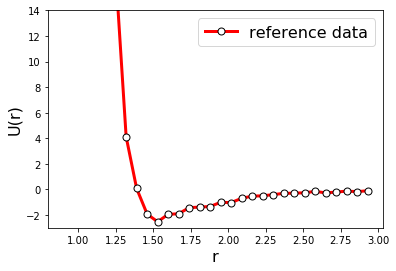

In [30]:
import random

random.seed(12345)

#create two list
r_data = []
U_data = []

noise_level = 0.2 

#populate the arrays with values from the Lennard-Jones equation
for i in range(0, r_step):
    r = r_init + i*dr
    r_data.append(r)
    U_temp = 4.0*epsilon_data*( (sigma_data/r)**12.0 - (sigma_data/r)**6.0)
    U_temp =  U_temp + random.gauss(0,noise_level)*U_temp
    U_data.append(U_temp)
    
#convert to np arrays
Ud = np.array(U_data)
rd = np.array(r_data)

plt.figure()
plt.plot(r_data, U_data, label = "reference data", markeredgecolor= 'black', 
         markersize= 7, markerfacecolor='white', marker='o', ls='-', lw=3, color='Red')

plt.xlabel('r', fontsize= 16)
plt.ylabel('U(r)', fontsize =16)

plt.ylim(-3,14)

plt.legend(loc=1, fontsize =16)
plt.show()

We can call the least squares fitting procedure again, using the same residual and starting guesses.

epsilon, known =  2.239  || epsilon, fitted 1.07734234268
sigma, known =  1.392  || sigma, fitted 1.47409019133


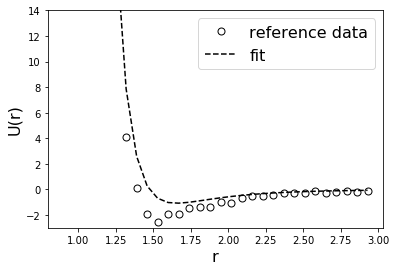

In [31]:
#calling the leastsq fitting function
plsq = leastsq(residual_function, p0, args=(U_data, r_data))

#extract the fitted parameters
epsilon_fitted = plsq[0][0]
sigma_fitted = plsq[0][1]

print('epsilon, known = ', epsilon_data, ' || epsilon, fitted', epsilon_fitted)
print('sigma, known = ', sigma_data, ' || sigma, fitted', sigma_fitted)

#create two list
r_fitted = []
U_fitted = []

#populate the lists with values using fitted parameters
for i in range(0, r_step):
    r = r_init + i*dr
    r_fitted.append(r)
    U_temp = 4.0*epsilon_fitted*( (sigma_fitted/r)**12.0 - (sigma_fitted/r)**6.0)
    U_fitted.append(U_temp)

#plot the target and fitted
plt.figure()
plt.plot(r_data, U_data, label = "reference data", markeredgecolor= 'black', 
         markersize= 7, color='white', marker='o', ls='')

plt.plot(r_fitted, U_fitted, label = "fit", color='black', ls='--')

plt.xlabel('r', fontsize= 16)
plt.ylabel('U(r)', fontsize =16)

plt.ylim(-3,14)

plt.legend(loc=1, fontsize =16)
plt.show()

While the fitting produced nearly perfect results for the first set of data, for this set, sigma is close, but epsilon is under predicted. This is caused by the fact that the values of `U` at small `r`  are significantly larger than at large `r`, and thus contribute more significantly to the residual (and hence dominate).  This can be fixed by normalizing the values in the residual function.  

In [33]:
def residual_function(p, U, r):
    epsilon, sigma = p
    U_test = 4.0*epsilon*( (sigma/r)**(12) - (sigma/r)**(6))
    U_known = U
    norm = np.abs(U_known) + np.abs(U_test)
    err = (U_known-U_test)/norm

    return err

Let us now test the new residual function and plot the results

epsilon, known =  2.239  || epsilon, fitted 2.32878425099
sigma, known =  1.392  || sigma, fitted 1.38591506364


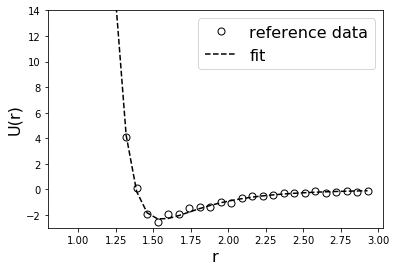

In [34]:
#calling the leastsq fitting function
plsq = leastsq(residual_function, p0, args=(Ud, rd))

#extract the fitted parameters
epsilon_fitted = plsq[0][0]
sigma_fitted = plsq[0][1]

print('epsilon, known = ', epsilon_data, ' || epsilon, fitted', epsilon_fitted)
print('sigma, known = ', sigma_data, ' || sigma, fitted', sigma_fitted)

#create two list
r_fitted = []
U_fitted = []

#populate the lists with values using fitted parameters
for i in range(0, r_step):
    r = r_init + i*dr
    r_fitted.append(r)
    U_temp = 4.0*epsilon_fitted*( (sigma_fitted/r)**12.0 - (sigma_fitted/r)**6.0)
    U_fitted.append(U_temp)

#plot the target and fitted
plt.figure()
plt.plot(r_data, U_data, label = "reference data", markeredgecolor= 'black', 
         markersize= 7, color='white', marker='o', ls='')

plt.plot(r_fitted, U_fitted, label = "fit", color='black', ls='--')

plt.xlabel('r', fontsize= 16)
plt.ylabel('U(r)', fontsize =16)

plt.ylim(-3,14)

plt.legend(loc=1, fontsize =16)
plt.show()